## IMPORTS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from  sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn import set_config
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import joblib

In [2]:
!pip install --upgrade pip

In [3]:
!pip install --upgrade scikit-learn

In [4]:
#df = pd.read_csv('scaled_data.csv')
#df.head()

In [5]:
#df = df.drop(columns=['name','steps','ingredients'])

In [6]:
#df.columns

In [7]:
#df.head()

In [8]:
#plt.figure(figsize=(13,13))

#sns.heatmap(df.corr(),
            #annot = True,
            #annot_kws = {"fontsize":8},
            #cmap='PuRd');

##  INITIATING MODEL (Robust)

In [9]:
#km = KMeans(n_clusters = 8)

In [10]:
#km.fit(df)

In [11]:
#km.inertia_

In [12]:
#labels = km.labels_
#labels

In [13]:
#fig = px.scatter_3d(df, 
                    #x = 'calories',
                    #y = 'protein (PDV)',
                    #z = 'sugar (PDV)',
                    #color = labels, width=500, height=500)
#fig.show()

### Optimal Number of Clusters

Queremos que tenga una "Inertia" lo mas bajo posible (sum of squared distances of observations to their associated (closest) cluster center)

In [14]:
# Apply the elbow method to find the optimal number of clusters.
#wcss = []
#clusters = list(range(1, 50))

#for k in clusters:
    #km_elbow = KMeans(n_clusters = k).fit(df)
    #wcss.append(km_elbow.inertia_)
#wcss

In [15]:
#plt.plot(clusters, wcss)
#plt.xlabel('k cluster number')

In [16]:
#kmeans = KMeans()
#elbow_visualizer = KElbowVisualizer(kmeans, n_clusters = (1,51))
#elbow_visualizer.fit(df)
#elbow_visualizer.show();

Agregamos los labels a la tabla

In [17]:
#km_optimo = KMeans(n_clusters = 5)

In [18]:
#km_optimo.fit(df)

In [19]:
#labels_optimo = km_optimo.labels_

In [20]:
#data_labeled_kmeans = pd.concat([df,pd.Series(labels_optimo)],axis=1).rename(columns={0:"label"})
#data_labeled_kmeans.head()

In [21]:
#data_labeled_kmeans.label.value_counts()

### PCA

In [22]:
#df.shape

In [23]:
#pca = PCA()

In [24]:
#pca.fit(df)

In [25]:
#w = 

## Initiating Model (Standard Scale)

### KMeans por caloria --> Final 


In [26]:
df2 = pd.read_csv('/Users/alfens/code/Alfens/WeekmealsWebsite/data/ss_data.csv')

In [27]:
df2.head()

,minutes,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),gluten_free,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories
0,-0.129793,0.077143,-0.685611,-0.729790,-0.671766,-0.294838,-0.328605,-0.801015,-0.600671,-0.431561,0.771330,0.297939,-0.762034,0.622917,-0.419828,0.784928,0.698667,0.719864,-0.545963,-0.354603
1,-0.231020,-0.270086,-0.955747,-0.521926,-0.339325,-0.359493,-0.146612,-0.361938,-0.136714,-0.546822,0.771330,0.297939,-0.762034,-1.605351,-0.419828,0.784928,0.698667,0.719864,-0.545963,-0.354603
2,0.173889,-0.790930,0.935206,-0.357544,-0.265450,-0.200341,0.185258,0.011278,-0.242761,-0.393141,0.771330,0.297939,-0.762034,0.622917,-0.419828,-1.274002,-1.431297,0.719864,-0.545963,-0.354603
3,-0.170284,0.077143,0.394934,-0.189922,-0.357794,-0.309758,-0.307194,-0.537569,-0.494624,0.183159,-1.296461,0.297939,-0.762034,0.622917,-0.419828,0.784928,0.698667,0.719864,-0.545963,-0.354603
4,-0.291756,-1.138159,-0.145338,-0.168436,0.307088,-0.324679,-0.071673,-0.713200,-0.282529,-0.354721,0.771330,0.297939,1.312278,0.622917,2.381929,0.784928,0.698667,0.719864,-0.545963,-0.354603


In [28]:
len(df2)

172966

#### LOW CALORIES

In [29]:
df_low = df2[df2['low_calories']> 0.5]
df_low.shape

(113928, 20)

In [30]:
df_low_entero = df_low.copy().reset_index(drop = True)

In [31]:
df_low.drop(columns = ['gluten_free', 'nut_free', 'lactose_free',
       'egg_free', 'vegan', 'veggie', 'fish', 'low_calories',
       'normal_calories', 'high_calories','calories'], inplace = True)

/Users/alfens/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
df_low.head()

,minutes,n_steps,n_ingredients,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,-0.129793,0.077143,-0.685611,-0.671766,-0.294838,-0.328605,-0.801015,-0.600671,-0.431561
1,-0.231020,-0.270086,-0.955747,-0.339325,-0.359493,-0.146612,-0.361938,-0.136714,-0.546822
2,0.173889,-0.790930,0.935206,-0.265450,-0.200341,0.185258,0.011278,-0.242761,-0.393141
3,-0.170284,0.077143,0.394934,-0.357794,-0.309758,-0.307194,-0.537569,-0.494624,0.183159
4,-0.291756,-1.138159,-0.145338,0.307088,-0.324679,-0.071673,-0.713200,-0.282529,-0.354721


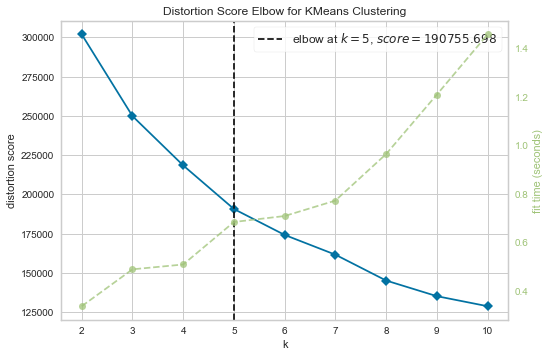

In [33]:
kmeanslow = KMeans()
elbow_visualizer = KElbowVisualizer(kmeanslow, n_clusters = (1,51))
elbow_visualizer.fit(df_low)
elbow_visualizer.show();

In [34]:
km_optimolow = KMeans(n_clusters = 5)
km_optimolow.fit(df_low)
labels_optimolow = km_optimolow.labels_

In [35]:
joblib.dump(km_optimolow, 'km_optimolow.sav')

new_model = joblib.load('km_optimolow.sav')

In [36]:
new_model.labels_

array([1, 1, 0, ..., 1, 0, 1], dtype=int32)

In [37]:
labels_optimolow.shape

(113928,)

In [38]:
df_low_entero.shape

(113928, 20)

In [39]:

data_labeled_low = pd.concat([df_low_entero,pd.DataFrame(labels_optimolow)],axis=1, join = 'inner').rename(columns={0:"label"})
data_labeled_low.tail()

,minutes,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),...,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories,label
113923,-0.210775,-0.096471,0.394934,-0.387896,-0.357794,-0.255050,0.142436,-0.383892,-0.415088,-0.316301,...,0.297939,-0.762034,0.622917,-0.419828,-1.274002,-1.431297,0.719864,-0.545963,-0.354603,0
113924,0.315608,4.764736,0.935206,-0.067147,0.233212,-0.284891,-0.221550,-0.361938,0.592363,-0.239461,...,0.297939,-0.762034,-1.605351,-0.419828,0.784928,0.698667,0.719864,-0.545963,-0.354603,3
113925,-0.271511,-0.790930,-0.415475,-0.641802,-0.634828,-0.165526,0.709828,-0.603430,-0.600671,-0.316301,...,0.297939,1.312278,0.622917,2.381929,0.784928,0.698667,0.719864,-0.545963,-0.354603,1
113926,-0.109547,-0.617315,3.366432,-0.109607,-0.191574,-0.190394,-0.050262,0.121048,-0.322297,-0.008941,...,0.297939,1.312278,0.622917,-0.419828,-1.274002,-1.431297,0.719864,-0.545963,-0.354603,0
113927,-0.190529,-0.617315,-0.415475,-0.716660,-0.560953,-0.349546,-0.296489,-0.713200,-0.534391,-0.585242,...,0.297939,1.312278,-1.605351,-0.419828,0.784928,0.698667,0.719864,-0.545963,-0.354603,1


In [40]:
data_labeled_low.shape

(113928, 21)

In [41]:
data_labeled_low.label.value_counts()

1    59604
0    36971
3    16160
4     1017
2      176
Name: label, dtype: int64

In [42]:
predict_low = data_labeled_low.groupby('label').mean()
predict_low


,minutes,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),gluten_free,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories
label,,,,,,,,,,,,,,,,,,,,
0,-0.069079,-0.226761,0.702291,-0.356659,-0.342033,-0.186543,-0.093078,-0.235183,-0.335742,-0.252640,-0.079870,-0.057204,0.114854,-0.059347,-0.021818,-0.142484,-0.113371,0.719864,-0.545963,-0.354603
1,-0.148015,-0.488645,-0.782668,-0.425721,-0.381010,-0.168864,-0.163656,-0.425671,-0.333703,-0.290826,0.166681,0.076364,0.071464,0.151535,0.199902,0.269021,0.263983,0.719864,-0.545963,-0.354603
2,16.068130,0.571353,-0.140734,-0.448492,-0.442374,-0.056081,0.419502,-0.456988,-0.417649,-0.267840,-0.250817,0.090307,0.616912,0.268420,0.662669,0.211703,0.226686,0.719864,-0.545963,-0.354603
3,-0.033878,1.546120,0.470091,-0.359503,-0.331828,-0.154578,-0.136373,-0.361419,-0.281572,-0.233422,-0.069350,-0.062293,-0.159123,-0.350985,-0.142946,0.102270,0.081557,0.719864,-0.545963,-0.354603
4,4.575152,0.133478,-0.168979,-0.406213,-0.391300,-0.103291,1.209934,-0.401161,-0.375763,-0.254799,-0.102957,0.071565,0.496423,0.292073,0.577454,0.181623,0.133190,0.719864,-0.545963,-0.354603


In [43]:
predict_low.drop(columns = ['gluten_free', 'nut_free', 'lactose_free',
       'egg_free', 'vegan', 'veggie', 'fish', 'low_calories',
       'normal_calories', 'high_calories','calories'], inplace = True)

In [44]:
predict_low

,minutes,n_steps,n_ingredients,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
label,,,,,,,,,
0,-0.069079,-0.226761,0.702291,-0.342033,-0.186543,-0.093078,-0.235183,-0.335742,-0.252640
1,-0.148015,-0.488645,-0.782668,-0.381010,-0.168864,-0.163656,-0.425671,-0.333703,-0.290826
2,16.068130,0.571353,-0.140734,-0.442374,-0.056081,0.419502,-0.456988,-0.417649,-0.267840
3,-0.033878,1.546120,0.470091,-0.331828,-0.154578,-0.136373,-0.361419,-0.281572,-0.233422
4,4.575152,0.133478,-0.168979,-0.391300,-0.103291,1.209934,-0.401161,-0.375763,-0.254799


In [45]:
predict_low.to_csv('predict_low.csv')

In [46]:
scaler = MinMaxScaler()
scaled_low = scaler.fit_transform(predict_low)

In [47]:
scaled_low = pd.DataFrame(scaled_low, columns = [['minutes', 'n_steps', 'n_ingredients', 'total fat (PDV)',
       'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)',
       'carbohydrates (PDV)']])
scaled_low = scaled_low.applymap(lambda x: x*10)
scaled_low.head()

,minutes,n_steps,n_ingredients,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,0.048677,1.287048,10.000000,9.076864,0.000000,0.513823,10.000000,6.019164,6.652144
1,0.000000,0.000000,0.000000,5.551010,1.355102,0.000000,1.411893,6.169050,0.000000
2,10.000000,5.209436,4.322908,0.000000,10.000000,4.245503,0.000000,0.000000,4.004327
3,0.070385,10.000000,8.436320,10.000000,2.450100,0.198620,4.308704,10.000000,10.000000
4,2.912633,3.057470,4.132702,4.620153,6.381281,10.000000,2.516935,3.078078,6.276080


#### MEDIUM CALORIES

In [48]:
df2.head()

,minutes,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),gluten_free,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories
0,-0.129793,0.077143,-0.685611,-0.729790,-0.671766,-0.294838,-0.328605,-0.801015,-0.600671,-0.431561,0.771330,0.297939,-0.762034,0.622917,-0.419828,0.784928,0.698667,0.719864,-0.545963,-0.354603
1,-0.231020,-0.270086,-0.955747,-0.521926,-0.339325,-0.359493,-0.146612,-0.361938,-0.136714,-0.546822,0.771330,0.297939,-0.762034,-1.605351,-0.419828,0.784928,0.698667,0.719864,-0.545963,-0.354603
2,0.173889,-0.790930,0.935206,-0.357544,-0.265450,-0.200341,0.185258,0.011278,-0.242761,-0.393141,0.771330,0.297939,-0.762034,0.622917,-0.419828,-1.274002,-1.431297,0.719864,-0.545963,-0.354603
3,-0.170284,0.077143,0.394934,-0.189922,-0.357794,-0.309758,-0.307194,-0.537569,-0.494624,0.183159,-1.296461,0.297939,-0.762034,0.622917,-0.419828,0.784928,0.698667,0.719864,-0.545963,-0.354603
4,-0.291756,-1.138159,-0.145338,-0.168436,0.307088,-0.324679,-0.071673,-0.713200,-0.282529,-0.354721,0.771330,0.297939,1.312278,0.622917,2.381929,0.784928,0.698667,0.719864,-0.545963,-0.354603


In [49]:
df_med = df2[df2['normal_calories']> 0.5]
df_med.shape

(39718, 20)

In [50]:
df_med.head()

,minutes,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),gluten_free,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories
8,5.559186,-0.443700,-0.685611,0.434183,0.547184,0.630236,-0.221550,-0.625384,0.950273,0.490520,0.771330,-3.356390,-0.762034,-1.605351,-0.419828,0.784928,0.698667,-1.389151,1.831625,-0.354603
9,11.673320,-0.270086,0.935206,-0.029121,-0.154636,0.704839,0.410074,-0.537569,-0.216249,0.298419,0.771330,0.297939,1.312278,0.622917,-0.419828,-1.274002,-1.431297,-1.389151,1.831625,-0.354603
26,-0.129793,0.077143,0.665070,-0.038670,0.066991,-0.190394,0.388663,0.406448,0.075381,-0.239461,0.771330,0.297939,-0.762034,0.622917,-0.419828,-1.274002,-1.431297,-1.389151,1.831625,-0.354603
33,-0.170284,-0.790930,-0.415475,0.286683,0.380964,-0.076003,0.292313,0.340586,0.101893,0.029479,-1.296461,0.297939,-0.762034,0.622917,-0.419828,-1.274002,-1.431297,-1.389151,1.831625,-0.354603
34,-0.279609,-0.443700,-0.415475,0.518250,0.177805,0.172673,0.270902,-0.054583,-0.322297,0.836300,-1.296461,0.297939,1.312278,0.622917,-0.419828,0.784928,0.698667,-1.389151,1.831625,-0.354603


In [51]:
df_med_entero = df_med.copy().reset_index(drop = True)

In [52]:
df_med_entero.head()

,minutes,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),gluten_free,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories
0,5.559186,-0.443700,-0.685611,0.434183,0.547184,0.630236,-0.221550,-0.625384,0.950273,0.490520,0.771330,-3.356390,-0.762034,-1.605351,-0.419828,0.784928,0.698667,-1.389151,1.831625,-0.354603
1,11.673320,-0.270086,0.935206,-0.029121,-0.154636,0.704839,0.410074,-0.537569,-0.216249,0.298419,0.771330,0.297939,1.312278,0.622917,-0.419828,-1.274002,-1.431297,-1.389151,1.831625,-0.354603
2,-0.129793,0.077143,0.665070,-0.038670,0.066991,-0.190394,0.388663,0.406448,0.075381,-0.239461,0.771330,0.297939,-0.762034,0.622917,-0.419828,-1.274002,-1.431297,-1.389151,1.831625,-0.354603
3,-0.170284,-0.790930,-0.415475,0.286683,0.380964,-0.076003,0.292313,0.340586,0.101893,0.029479,-1.296461,0.297939,-0.762034,0.622917,-0.419828,-1.274002,-1.431297,-1.389151,1.831625,-0.354603
4,-0.279609,-0.443700,-0.415475,0.518250,0.177805,0.172673,0.270902,-0.054583,-0.322297,0.836300,-1.296461,0.297939,1.312278,0.622917,-0.419828,0.784928,0.698667,-1.389151,1.831625,-0.354603


In [53]:
df_med.drop(columns = ['gluten_free', 'nut_free', 'lactose_free',
       'egg_free', 'vegan', 'veggie', 'fish', 'low_calories',
       'normal_calories', 'high_calories', 'calories'], inplace = True)

/Users/alfens/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
df_med.head()

,minutes,n_steps,n_ingredients,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
8,5.559186,-0.443700,-0.685611,0.547184,0.630236,-0.221550,-0.625384,0.950273,0.490520
9,11.673320,-0.270086,0.935206,-0.154636,0.704839,0.410074,-0.537569,-0.216249,0.298419
26,-0.129793,0.077143,0.665070,0.066991,-0.190394,0.388663,0.406448,0.075381,-0.239461
33,-0.170284,-0.790930,-0.415475,0.380964,-0.076003,0.292313,0.340586,0.101893,0.029479
34,-0.279609,-0.443700,-0.415475,0.177805,0.172673,0.270902,-0.054583,-0.322297,0.836300


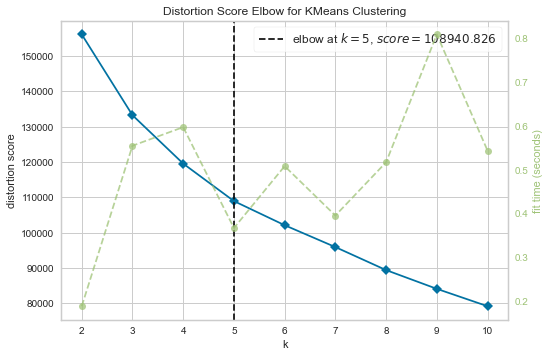

In [55]:
kmeans_med = KMeans()
elbow_visualizer = KElbowVisualizer(kmeans_med, n_clusters = (1,51))
elbow_visualizer.fit(df_med)
elbow_visualizer.show();

In [56]:
km_optimomed = KMeans(n_clusters = 5)
km_optimomed.fit(df_med)

KMeans(n_clusters=5)

In [57]:
joblib.dump(km_optimomed, 'km_optimomed.sav')

['km_optimomed.sav']

In [58]:
new_model = joblib.load('km_optimolow.sav')

In [59]:
labels_optimo_med = km_optimomed.labels_

In [60]:

data_labeled_med = pd.concat([df_med_entero,pd.DataFrame(labels_optimo_med)],axis=1, join = 'inner').rename(columns={0:"label"})
data_labeled_med.tail()

,minutes,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),...,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories,label
39713,0.619290,1.986903,0.394934,0.139524,0.030054,0.247276,-0.307194,-0.493661,0.406780,0.375259,...,0.297939,-0.762034,-1.605351,-0.419828,0.784928,0.698667,-1.389151,1.831625,-0.354603,2
39714,-0.109547,0.077143,0.935206,0.094677,-0.136167,0.605369,-0.135906,-0.515615,-0.401832,0.490520,...,-3.356390,1.312278,-1.605351,-0.419828,0.784928,0.698667,-1.389151,1.831625,-0.354603,3
39715,-0.069056,0.771601,1.205343,0.005495,0.399433,-0.264997,-0.232256,-0.230214,0.950273,-0.316301,...,0.297939,-0.762034,0.622917,-0.419828,-1.274002,0.698667,-1.389151,1.831625,-0.354603,3
39716,-0.129793,-0.617315,0.394934,0.254966,0.399433,-0.220235,-0.232256,1.328511,0.565851,-0.354721,...,0.297939,-0.762034,0.622917,-0.419828,0.784928,0.698667,-1.389151,1.831625,-0.354603,0
39717,-0.121694,0.597987,0.394934,0.005324,-0.431670,-0.235156,0.067498,-0.120445,-0.481368,0.452099,...,0.297939,1.312278,0.622917,-0.419828,-1.274002,0.698667,-1.389151,1.831625,-0.354603,3


In [61]:
len(data_labeled_med)

39718

In [62]:
data_labeled_med.label.value_counts()

0    12348
1    11682
3    10795
2     4545
4      348
Name: label, dtype: int64

In [63]:
predict_med = data_labeled_med.groupby('label').mean()
predict_med

,minutes,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),gluten_free,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories
label,,,,,,,,,,,,,,,,,,,,
0,-0.007307,-0.294129,-0.353650,0.201812,0.275674,-0.229308,0.153985,0.889777,0.269824,-0.183900,-0.045538,0.200573,-0.038511,0.214545,-0.277108,-0.711748,-0.659211,-1.389151,1.831625,-0.354603
1,-0.125261,-0.257662,-0.427106,0.150766,0.071203,0.225097,-0.055645,-0.303101,0.092890,0.312696,0.030557,-0.117795,-0.175360,-0.053651,0.043054,0.484601,0.428638,-1.389151,1.831625,-0.354603
2,0.052323,2.321909,1.119577,0.198486,0.214698,0.028434,0.037101,0.217287,0.275585,0.089472,-0.143594,-0.102469,-0.371360,-0.463517,-0.316265,-0.175453,-0.200182,-1.389151,1.831625,-0.354603
3,-0.028445,0.214169,1.228040,0.180071,0.156145,-0.130634,0.101580,0.481384,0.114520,0.032131,-0.227607,-0.049044,-0.112358,0.003254,-0.272148,-0.622087,-0.594504,-1.389151,1.831625,-0.354603
4,8.158461,0.543608,0.167492,0.203541,0.174037,0.233956,0.830911,0.385377,0.120939,0.073088,-0.137785,0.119423,0.447981,0.161896,0.216203,-0.102542,-0.133733,-1.389151,1.831625,-0.354603


In [64]:
predict_med.drop(columns = ['gluten_free', 'nut_free', 'lactose_free',
       'egg_free', 'vegan', 'veggie', 'fish', 'low_calories',
       'normal_calories', 'high_calories','calories'], inplace = True)

In [65]:
predict_med.head()

,minutes,n_steps,n_ingredients,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
label,,,,,,,,,
0,-0.007307,-0.294129,-0.353650,0.275674,-0.229308,0.153985,0.889777,0.269824,-0.183900
1,-0.125261,-0.257662,-0.427106,0.071203,0.225097,-0.055645,-0.303101,0.092890,0.312696
2,0.052323,2.321909,1.119577,0.214698,0.028434,0.037101,0.217287,0.275585,0.089472
3,-0.028445,0.214169,1.228040,0.156145,-0.130634,0.101580,0.481384,0.114520,0.032131
4,8.158461,0.543608,0.167492,0.174037,0.233956,0.830911,0.385377,0.120939,0.073088


In [66]:
predict_med.to_csv('predict_med.csv')

In [67]:
scaler = MinMaxScaler()
scaled_med = scaler.fit_transform(predict_med)

In [68]:
scaled_med = pd.DataFrame(scaled_med, columns = [['minutes', 'n_steps', 'n_ingredients', 'total fat (PDV)',
       'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)',
       'carbohydrates (PDV)']])
scaled_med = scaled_med.applymap(lambda x: x*10)
scaled_med.head()

,minutes,n_steps,n_ingredients,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,0.142393,0.000000,0.443802,10.000000,0.000000,2.364544,10.000000,9.684662,0.000000
1,0.000000,0.139399,0.000000,0.000000,9.808767,0.000000,0.000000,0.000000,10.000000
2,0.214377,10.000000,9.344692,7.017896,5.563619,1.046143,4.362461,10.000000,5.504915
3,0.116875,1.943007,10.000000,4.154257,2.129978,1.773441,6.576409,1.183949,4.350229
4,10.000000,3.202310,3.592420,5.029281,10.000000,10.000000,5.771576,1.535282,5.174993


#### HIGH CALORIES

In [69]:
df_high = df2[df2['high_calories']> 0.5]
df_high.shape

(19320, 20)

In [70]:
df_h_entero = df_high.copy().reset_index(drop = True)

In [71]:
df_h_entero.shape

(19320, 20)

In [72]:
df_high.drop(columns = ['gluten_free', 'nut_free', 'lactose_free',
       'egg_free', 'vegan', 'veggie', 'fish', 'low_calories',
       'normal_calories', 'high_calories','calories'], inplace = True)

/Users/alfens/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [73]:
df_high.head()

,minutes,n_steps,n_ingredients,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
5,0.133399,-0.096471,3.366432,0.861156,1.520496,2.615406,1.262649,0.539339,0.797880
6,0.376344,-0.443700,-0.955747,4.019346,6.135919,0.859705,1.943220,5.112635,7.867167
7,-0.069056,0.250758,-0.145338,2.283265,4.494659,0.816883,0.516217,3.508667,4.716724
19,-0.271511,1.639674,0.935206,3.409871,0.476057,0.377957,-0.427799,1.493766,0.528940
20,-0.251266,-0.617315,-1.225883,3.262119,-0.339599,0.238786,-0.361938,4.927052,-0.546822


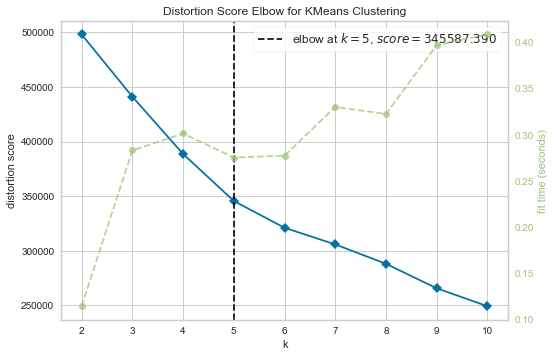

In [74]:
kmeanshigh = KMeans()
elbow_visualizer = KElbowVisualizer(kmeanshigh, n_clusters = (1,51))
elbow_visualizer.fit(df_high)
elbow_visualizer.show();

In [75]:
km_optimo_h = KMeans(n_clusters = 5)
km_optimo_h.fit(df_high)

KMeans(n_clusters=5)

In [76]:
joblib.dump(km_optimo_h, 'km_optimo_h.sav')

['km_optimo_h.sav']

In [77]:
new_model = joblib.load('km_optimo_h.sav')

In [78]:
new_model

KMeans(n_clusters=5)

In [79]:
labels_optimo_h = km_optimo_h.labels_

In [80]:
data_labeled_h = pd.concat([df_h_entero,pd.DataFrame(labels_optimo_h)],axis=1, join = 'inner').rename(columns={0:"label"})
data_labeled_h.head()

,minutes,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),...,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories,label
0,0.133399,-0.096471,3.366432,1.074318,0.861156,1.520496,2.615406,1.262649,0.539339,0.797880,...,0.297939,1.312278,0.622917,-0.419828,-1.274002,-1.431297,-1.389151,-0.545963,2.820052,1
1,0.376344,-0.443700,-0.955747,6.464985,4.019346,6.135919,0.859705,1.943220,5.112635,7.867167,...,0.297939,-0.762034,0.622917,-0.419828,0.784928,0.698667,-1.389151,-0.545963,2.820052,2
2,-0.069056,0.250758,-0.145338,3.734098,2.283265,4.494659,0.816883,0.516217,3.508667,4.716724,...,0.297939,-0.762034,-1.605351,-0.419828,0.784928,0.698667,-1.389151,-0.545963,2.820052,3
3,-0.271511,1.639674,0.935206,2.018661,3.409871,0.476057,0.377957,-0.427799,1.493766,0.528940,...,0.297939,-0.762034,-1.605351,-0.419828,0.784928,0.698667,-1.389151,-0.545963,2.820052,1
4,-0.251266,-0.617315,-1.225883,1.382789,3.262119,-0.339599,0.238786,-0.361938,4.927052,-0.546822,...,0.297939,-0.762034,-1.605351,-0.419828,0.784928,0.698667,-1.389151,-0.545963,2.820052,1


In [81]:
data_labeled_h.label.value_counts()

1    14618
3     2556
0     1331
2      799
4       16
Name: label, dtype: int64

In [82]:
predict_high = data_labeled_h.groupby('label').mean()
predict_high

,minutes,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),gluten_free,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories
label,,,,,,,,,,,,,,,,,,,,
0,0.299466,0.284411,0.045441,4.466621,5.686713,0.624063,1.523116,4.311962,5.286934,1.407693,0.003870,0.009656,-0.116831,-0.068499,-0.200908,-0.157137,-0.191085,-1.389151,-0.545963,2.820052
1,0.144429,0.348599,0.306065,1.120514,1.165721,0.097744,0.364881,1.169923,0.958022,0.559827,-0.198062,0.004703,-0.056643,0.049768,-0.151114,-0.293975,-0.310072,-1.389151,-0.545963,2.820052
2,0.115363,0.376569,0.087946,8.252112,6.585258,9.527640,1.303360,2.054748,7.094852,8.602389,0.349490,-0.703685,-0.479055,-0.902568,-0.240992,0.777197,0.690670,-1.389151,-0.545963,2.820052
3,0.238003,0.039717,-0.139737,3.410902,1.703430,4.306665,0.743264,0.815103,1.426496,4.531643,0.102291,-0.465524,0.027601,-0.564446,0.142497,0.749485,0.665334,-1.389151,-0.545963,2.820052
4,1.001423,-0.118173,-0.567426,3.489049,0.641837,6.009095,61.700387,4.059025,0.287476,4.918429,-0.004092,0.297939,1.052989,0.622917,1.331270,0.270195,0.299299,-1.389151,-0.545963,2.820052


In [83]:
predict_high.drop(columns = ['gluten_free', 'nut_free', 'lactose_free',
       'egg_free', 'vegan', 'veggie', 'fish', 'low_calories',
       'normal_calories', 'high_calories','calories'], inplace = True)

predict_high.head()

,minutes,n_steps,n_ingredients,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
label,,,,,,,,,
0,0.299466,0.284411,0.045441,5.686713,0.624063,1.523116,4.311962,5.286934,1.407693
1,0.144429,0.348599,0.306065,1.165721,0.097744,0.364881,1.169923,0.958022,0.559827
2,0.115363,0.376569,0.087946,6.585258,9.527640,1.303360,2.054748,7.094852,8.602389
3,0.238003,0.039717,-0.139737,1.703430,4.306665,0.743264,0.815103,1.426496,4.531643
4,1.001423,-0.118173,-0.567426,0.641837,6.009095,61.700387,4.059025,0.287476,4.918429


In [84]:
predict_high.to_csv('predict_high.csv')

In [85]:
scaler = MinMaxScaler()
scaled_h = scaler.fit_transform(predict_high)


In [86]:
scaled_h= pd.DataFrame(scaled_h, columns = [['minutes', 'n_steps', 'n_ingredients', 'total fat (PDV)',
       'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)',
       'carbohydrates (PDV)']])
scaled_h = scaled_h.applymap(lambda x: x*10)
scaled_h.head()

,minutes,n_steps,n_ingredients,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,2.077777,8.137261,7.016300,8.488168,0.558139,0.188836,10.000000,7.344177,1.054224
1,0.328044,9.434654,10.000000,0.881451,0.000000,0.000000,1.014682,0.985029,0.000000
2,0.000000,10.000000,7.502901,10.000000,10.000000,0.153007,3.545023,10.000000,10.000000
3,1.384112,3.191364,4.896319,1.786164,4.463381,0.061691,0.000000,1.673214,4.938496
4,10.000000,0.000000,0.000000,0.000000,6.268734,10.000000,9.276672,0.000000,5.419420


### KMeans

In [87]:
#df2 = pd.read_csv('ss_data.csv')
#df2.shape

In [88]:
#wcss = []
#clusters = list(range(1, 50))

#for k in clusters:
    #km_elbow = KMeans(n_clusters = k).fit(df2)
    #wcss.append(km_elbow.inertia_)
#wcss

Ploteamos el elbow method

In [89]:
#plt.plot(clusters, wcss)
#plt.xlabel('k cluster number')

Ploteamos con elbow_visualizer

In [90]:
#kmeans = KMeans()
#elbow_visualizer = KElbowVisualizer(kmeans, n_clusters = (1,51))
#elbow_visualizer.fit(df2)
#elbow_visualizer.show();

Fitteamos y vemos los labels

km_optimo = KMeans(n_clusters = 6)
km_optimo.fit(df2)
labels_optimo = km_optimo.labels_
data_labeled_kmeans = pd.concat([df2,pd.Series(labels_optimo)],axis=1).rename(columns={0:"label"})
data_labeled_kmeans.head()

km_optimo = KMeans(n_clusters = 6)
km_optimo.fit(df2)
labels_optimo = km_optimo.labels_

data_labeled_kmeans = pd.concat([df2,pd.Series(labels_optimo)],axis=1).rename(columns={0:"label"})
data_labeled_kmeans.head()

data_labeled_kmeans.label.value_counts()

agrup = data_labeled_kmeans.groupby('label').mean()
agrup

### KMeans sin dummies

df3.columns

df3 = df2.copy()

df_todo = df2.copy()

df3.drop(columns = ['gluten_free', 'nut_free', 'lactose_free',
       'egg_free', 'vegan', 'veggie', 'fish', 'low_calories',
       'normal_calories', 'high_calories'], inplace = True)

df3.head()

kmeans = KMeans()
elbow_visualizer = KElbowVisualizer(kmeans, n_clusters = (1,51))
elbow_visualizer.fit(df3)
elbow_visualizer.show();

km_optimo = KMeans(n_clusters = 6)
km_optimo.fit(df3)
labels_optimo = km_optimo.labels_

data_labeled_kmeans = pd.concat([df_todo,pd.Series(labels_optimo)],axis=1).rename(columns={0:"label"})
data_labeled_kmeans.head()

data_labeled_kmeans.label.value_counts()

agrup = data_labeled_kmeans.groupby('label').mean()
agrup

### PCA

In [91]:
#df2.shape

In [92]:
#pca = PCA()

In [93]:
#pca.fit(df2)

In [94]:
#columnas = df2.columns

COMPONENTS

In [95]:
# Access our 20 PCs 
#W = pca.components_

# Print PCs as COLUMNS
#W = pd.DataFrame(W.T,
                 #index=columnas,
                 #columns=[f'PC{i}' for i in range(1, 21)])
#W

Projection on our dataset

In [96]:
#df2p = pca.transform(df2)
#df2p = pd.DataFrame(df2p, columns=[f'PC{i}' for i in range(1, 21)])
#df2p.head()

HEATMAP

In [97]:
#sns.heatmap(df2p.corr(), cmap='coolwarm');

In [98]:
#X_reconstructed = pca3.inverse_transform(centroides)

Ploteamos con elbow visualizer

In [99]:
#kmeans = KMeans()
#elbow_visualizer = KElbowVisualizer(kmeans, n_clusters = (1,51))
#elbow_visualizer.fit(df2p)
#elbow_visualizer.show();

In [100]:
#km_optimo = KMeans(n_clusters = 6)
#km_optimo.fit(df2p)
#labels_optimo = km_optimo.labels_

In [101]:
#data_labeled_kmeans = pd.concat([df2p,pd.Series(labels_optimo)],axis=1).rename(columns={0:"label"})
#data_labeled_kmeans.head()

In [102]:
#data_labeled_kmeans.label.value_counts()

## LOG DATA

df = pd.read_csv('log_data.csv')
df.head()

df_low = df[df['normal_calories']> 0]
df_low.shape

scaler = StandardScaler()

df_low = scaler.fit_transform(df_low)

df_low = pd.DataFrame(df_low, columns = [['minutes', 'n_steps', 'n_ingredients', 'calories', 'total fat (PDV)',
       'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)',
       'carbohydrates (PDV)', 'gluten_free', 'nut_free', 'lactose_free',
       'egg_free', 'vegan', 'veggie', 'fish', 'low_calories',
       'normal_calories', 'high_calories']])

df_low_entero = df_low.copy().reset_index(drop = True)

df_low_entero.head()

df_low.drop(columns = ['gluten_free', 'nut_free', 'lactose_free',
      'egg_free', 'vegan', 'veggie', 'fish', 'low_calories',
       'normal_calories', 'high_calories'], inplace = True)

kmeans = KMeans()
elbow_visualizer = KElbowVisualizer(kmeans, n_clusters = (1,51))
elbow_visualizer.fit(df_low)
elbow_visualizer.show();

km_optimo = KMeans(n_clusters = 4)
km_optimo.fit(df_low)

labels_optimo = km_optimo.labels_


data_labeled_kmeans = pd.concat([df_low_entero,pd.DataFrame(labels_optimo)],axis=1, join = 'inner').rename(columns={0:"label"})
data_labeled_kmeans.tail()

data_labeled_kmeans.label.value_counts()

## PREDICT RANKING:

In [103]:

def prediccion(a,b,c,d,e,f,g,h,i,predict_df, modelo):

    values = []
    values.append(predict_df.minutes[a])
    values.append(predict_df.n_steps[b])
    values.append(predict_df.n_ingredients[c])
    values.append(predict_df['total fat (PDV)'][d])
    values.append(predict_df['sugar (PDV)'][e])
    values.append(predict_df['sodium (PDV)'][f])
    values.append(predict_df['protein (PDV)'][g])
    values.append(predict_df['saturated fat (PDV)'][h])
    values.append(predict_df['carbohydrates (PDV)'][i])
    pred = modelo.predict(np.array([values]))
    print(pred)
        
    return pred


choice = int(input("Enter your choice: "))
if choice == 1:
    print("Low Calorie")
    prediccion(1,4,2,1,3,3,1,0,0,predict_low, km_optimolow)
elif choice == 2:
    print("Medium Calorie")
    prediccion(1,1,1,1,1,1,1,1,1,predict_med,km_optimomed)
elif choice == 3:
    print("High Calorie")
    prediccion(2,2,2,2,2,2,2,2,2,predict_high,km_optimo_h)
else: 
     print("Invalid choice")



Enter your choice: 1
Low Calorie
[1]


/Users/alfens/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


## FILTRADO DE DF

In [138]:
df_filt = pd.read_csv('/Users/alfens/code/Alfens/WeekmealsWebsite/data/ss_data_full.csv')
df_filt.head()

,name,minutes,n_steps,steps,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),...,gluten_free,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories
0,arriba baked winter squash mexican style,-0.129793,0.077143,"['make a choice and proceed with recipe', 'dep...",winter squash mexican seasoning mixed spice ho...,-0.685611,51.5,-0.671766,-0.294838,-0.328605,...,1,1,0,1,0,1,1,1.0,0.0,0.0
1,a bit different breakfast pizza,-0.231020,-0.270086,"['preheat oven to 425 degrees f', 'press dough...",prepared pizza crust sausage patty eggs milk s...,-0.955747,173.4,-0.339325,-0.359493,-0.146612,...,1,1,0,0,0,1,1,1.0,0.0,0.0
2,all in the kitchen chili,0.173889,-0.790930,"['brown ground beef in large pot', 'add choppe...",ground beef yellow onions diced tomatoes tomat...,0.935206,269.8,-0.265450,-0.200341,0.185258,...,1,1,0,1,0,0,0,1.0,0.0,0.0
3,alouette potatoes,-0.170284,0.077143,['place potatoes in a large pot of lightly sal...,spreadable cheese with garlic and herbs new po...,0.394934,368.1,-0.357794,-0.309758,-0.307194,...,0,1,0,1,0,1,1,1.0,0.0,0.0
4,aww marinated olives,-0.291756,-1.138159,['toast the fennel seeds and lightly crush the...,fennel seeds green olives ripe olives garlic p...,-0.145338,380.7,0.307088,-0.324679,-0.071673,...,1,1,1,1,1,1,1,1.0,0.0,0.0


In [139]:
def user_choice(calories, gluten, nut, lactose, egg, vegan, veggie, fish):
    import pandas as pd
    df = pd.read_csv('/Users/alfens/code/Alfens/WeekmealsWebsite/data/ss_data_full.csv')
    df2 = df.copy()
    if calories == 1:
        df2= df2[df2['low_calories'] == 1.0]
    elif calories == 2: 
        df2= df2[df2['normal_calories'] == 1.0]
    elif calories == 3: 
        df2= df2[df2['high_calories'] == 1.0]
    if gluten == 1:
        df2 = df2[df2['gluten_free'] == gluten]
    if nut == 1:
        df2 = df2[df2['nut_free'] == nut]  
    if lactose == 1:
        df2 = df2[df2['lactose_free'] == lactose]
    if egg == 1:
        df2 = df2[df2['egg_free'] == egg]
    if vegan == 1:
        df2 = df2[df2['vegan'] == vegan]
    if veggie == 1:
        df2 = df2[df2['veggie'] == veggie]
    if fish == 1:
        df2 = df2[df2['fish'] == fish]
    return df2.reset_index(drop=True)

In [140]:
user_choice(1,0,1,0,0,0,0,0).head()

,name,minutes,n_steps,steps,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),...,gluten_free,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories
0,arriba baked winter squash mexican style,-0.129793,0.077143,"['make a choice and proceed with recipe', 'dep...",winter squash mexican seasoning mixed spice ho...,-0.685611,51.5,-0.671766,-0.294838,-0.328605,...,1,1,0,1,0,1,1,1.0,0.0,0.0
1,a bit different breakfast pizza,-0.231020,-0.270086,"['preheat oven to 425 degrees f', 'press dough...",prepared pizza crust sausage patty eggs milk s...,-0.955747,173.4,-0.339325,-0.359493,-0.146612,...,1,1,0,0,0,1,1,1.0,0.0,0.0
2,all in the kitchen chili,0.173889,-0.790930,"['brown ground beef in large pot', 'add choppe...",ground beef yellow onions diced tomatoes tomat...,0.935206,269.8,-0.265450,-0.200341,0.185258,...,1,1,0,1,0,0,0,1.0,0.0,0.0
3,alouette potatoes,-0.170284,0.077143,['place potatoes in a large pot of lightly sal...,spreadable cheese with garlic and herbs new po...,0.394934,368.1,-0.357794,-0.309758,-0.307194,...,0,1,0,1,0,1,1,1.0,0.0,0.0
4,aww marinated olives,-0.291756,-1.138159,['toast the fennel seeds and lightly crush the...,fennel seeds green olives ripe olives garlic p...,-0.145338,380.7,0.307088,-0.324679,-0.071673,...,1,1,1,1,1,1,1,1.0,0.0,0.0


## Pasarle platos random al usuario

In [141]:
tabla_user = user_choice(1,0,1,0,0,0,0,0)

In [142]:
tabla_user.shape

(105055, 23)

In [143]:
tabla_user_completa = tabla_user.copy()

In [144]:
tabla_user_completa.shape

(105055, 23)

In [ ]:
pd.read_csv()

In [116]:
tabla_user = user_choice(1,0,1,0,0,0,0,0)[['name','steps','ingredients']].sample(10)
tabla_user

,name,steps,ingredients
5420,bacon muffins,"['grease 12 muffin cups', 'preheat oven to 400...",bacon flour baking powder sugar salt egg milk oil
77054,red onion trout,"['heat oven to 350f', 'in a food processor , c...",trout fillets red onion kosher salt black pepp...
102057,welsh cakes,['rub the butter into the flour with a pinch o...,butter self raising flour golden caster sugar ...
79434,rosemary oven fries,"['preheat oven to 425', 'scrub the potatoes', ...",potatoes oil dried rosemary salt and pepper
54429,lemon chicken green olive tagine,['heat the oil over a high heat in a heavy-bas...,olive oil chicken thigh fillets onions garlic ...
42873,green beans a la lemon,['melt 2 tablespoons of butter over medium hea...,butter parsley flakes onion flour salt garlic ...
14680,cajun cornbread stuffing,"['fry bacon until crisp , remove from pan and ...",bacon garlic cloves onion celery green pepper ...
19392,chicken chipotle,"['put the chicken breasts , onion , garlic clo...",boneless skinless chicken breasts yellow onion...
12836,breakfast sandwiches oamc,"['preheat oven to 350 degrees', 'whisk togethe...",egg whites egg salt and pepper yellow onion gr...
47306,home style scrambled eggs,"['beat eggs , salt and water', 'melt butter in...",eggs salt water butter potatoes zucchini tomatoes


In [117]:
plato_elegido = 4

In [118]:
plato = pd.DataFrame(tabla_user.iloc[plato_elegido]).T
plato

,name,steps,ingredients
54429,lemon chicken green olive tagine,['heat the oil over a high heat in a heavy-bas...,olive oil chicken thigh fillets onions garlic ...


In [119]:
plato_index = int(plato.index[0])
plato_index

54429

In [120]:
plato_completo =  pd.DataFrame(tabla_user_completa.iloc[plato_index]).T
plato_completo

,name,minutes,n_steps,steps,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),...,gluten_free,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories
54429,lemon chicken green olive tagine,-0.109547,0.250758,['heat the oil over a high heat in a heavy-bas...,olive oil chicken thigh fillets onions garlic ...,0.66507,402.5,-0.376263,-0.225209,-0.275078,...,0,1,1,1,0,0,0,1.0,0.0,0.0


## KNN y devolverle el resultado

Entrenar el modelo

In [121]:
tabla_user_completa.head()

,name,minutes,n_steps,steps,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),...,gluten_free,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories
0,arriba baked winter squash mexican style,-0.129793,0.077143,"['make a choice and proceed with recipe', 'dep...",winter squash mexican seasoning mixed spice ho...,-0.685611,51.5,-0.671766,-0.294838,-0.328605,...,1,1,0,1,0,1,1,1.0,0.0,0.0
1,a bit different breakfast pizza,-0.231020,-0.270086,"['preheat oven to 425 degrees f', 'press dough...",prepared pizza crust sausage patty eggs milk s...,-0.955747,173.4,-0.339325,-0.359493,-0.146612,...,1,1,0,0,0,1,1,1.0,0.0,0.0
2,all in the kitchen chili,0.173889,-0.790930,"['brown ground beef in large pot', 'add choppe...",ground beef yellow onions diced tomatoes tomat...,0.935206,269.8,-0.265450,-0.200341,0.185258,...,1,1,0,1,0,0,0,1.0,0.0,0.0
3,alouette potatoes,-0.170284,0.077143,['place potatoes in a large pot of lightly sal...,spreadable cheese with garlic and herbs new po...,0.394934,368.1,-0.357794,-0.309758,-0.307194,...,0,1,0,1,0,1,1,1.0,0.0,0.0
4,aww marinated olives,-0.291756,-1.138159,['toast the fennel seeds and lightly crush the...,fennel seeds green olives ripe olives garlic p...,-0.145338,380.7,0.307088,-0.324679,-0.071673,...,1,1,1,1,1,1,1,1.0,0.0,0.0


In [122]:
tabla_user_completa.columns

Index(['name', 'minutes', 'n_steps', 'steps', 'ingredients', 'n_ingredients',
       'calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)',
       'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)',
       'gluten_free', 'nut_free', 'lactose_free', 'egg_free', 'vegan',
       'veggie', 'fish', 'low_calories', 'normal_calories', 'high_calories'],
      dtype='object')

In [123]:
# Define X and y
X = tabla_user_completa.drop(columns=['name','steps','ingredients','gluten_free', 'nut_free', 'lactose_free', 'egg_free', 'vegan',
       'veggie', 'fish', 'low_calories', 'normal_calories', 'high_calories']) #Remove non numerical features
y = tabla_user_completa['calories']

knn_model = KNeighborsRegressor().fit(X,y) # Instanciate and train model

In [124]:
joblib.dump(knn_model, 'knn_model.sav')

['knn_model.sav']

Le pasamos el nuevo point. "Since we are only concerned by the similarity of features between the songs, it doesn't matter which target it is fitted to"

In [127]:
# Pass song to model, ask for 11 closest points, and unpack the corresponding indices to a list
ind_list = list(knn_model.kneighbors(plato_completo.drop(columns=['name','steps','ingredients','gluten_free', 'nut_free', 'lactose_free', 'egg_free', 'vegan',
       'veggie', 'fish', 'low_calories', 'normal_calories', 'high_calories']),n_neighbors=8)[1][0])
ind_list

[54429, 77076, 31028, 77002, 101172, 20036, 86723, 70650]

In [129]:
# Filter original dataframe with indices list and sort by tempo
recommendation = tabla_user_completa.iloc[ind_list, :].sort_values(by="calories")
recommendation

,name,minutes,n_steps,steps,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),...,gluten_free,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories
70650,pesto shrimp with couscous with parchment paper,-0.214824,0.424372,"['preheat oven to 425 degrees', 'put couscous ...",low sodium chicken broth couscous lemon zest r...,0.124798,401.9,-0.339325,-0.294838,-0.114495,...,1,1,1,1,0,0,0,1.0,0.0,0.0
86723,southerwestern pork tenderloin with corn salad,-0.170284,0.250758,"['preheat oven to 400f', 'butterfly the tender...",pork tenderloin brown sugar chili powder groun...,0.124798,402.0,-0.283918,0.038388,-0.071673,...,1,1,1,1,0,0,0,1.0,0.0,0.0
77076,red pepper lemon shrimp,-0.271511,0.597987,"['cook pasta in salted water till al dente', '...",pasta olive oil large shrimp crushed red peppe...,0.665070,402.3,-0.450139,-0.334626,-0.253667,...,0,1,0,1,0,0,1,1.0,0.0,0.0
31028,dijon chicken au gratin,-0.129793,-0.096471,['spread uncooked rice in lightly greased 13 x...,instant rice boneless skinless chicken breast ...,0.124798,402.4,-0.468608,-0.289864,-0.050262,...,0,1,0,1,0,0,0,1.0,0.0,0.0
20036,chicken pizzaioli,-0.222922,0.597987,['place chicken in a bowl and use a fork to po...,whole tomatoes garlic cloves pitted black oliv...,0.124798,402.4,-0.505546,-0.220235,-0.232256,...,1,1,1,1,0,0,0,1.0,0.0,0.0
54429,lemon chicken green olive tagine,-0.109547,0.250758,['heat the oil over a high heat in a heavy-bas...,olive oil chicken thigh fillets onions garlic ...,0.665070,402.5,-0.376263,-0.225209,-0.275078,...,0,1,1,1,0,0,0,1.0,0.0,0.0
101172,vietnamese chicken sandwich food network maga...,-0.231020,-0.270086,['soak first 3 ingredients in ice water for 5 ...,red onion carrot radishes hoagie rolls mayonna...,0.935206,402.8,-0.173105,-0.220235,-0.103790,...,0,1,1,1,0,0,0,1.0,0.0,0.0
77002,red lentil soup with lime and cilantro,-0.069056,0.250758,"['melt butter in soup pot over medium heat', '...",butter garlic cloves onion celery ribs red len...,0.394934,402.9,-0.357794,-0.309758,0.153142,...,1,1,0,1,0,0,0,1.0,0.0,0.0


In [130]:
tabla_user_completa.shape

(105055, 23)